# Data Set building

In [157]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast 
import os 

In [158]:
df = pl.read_csv("/media/parker/Data_Drive/quick-draw-data/master_doodle_dataframe.csv")

In [159]:
df.head()

shape: (5, 6)
┌─────────────┬──────────────────┬──────────────────┬────────────┬───────────────┬─────────────────┐
│ countrycode ┆ drawing          ┆ key_id           ┆ recognized ┆ word          ┆ image_path      │
│ ---         ┆ ---              ┆ ---              ┆ ---        ┆ ---           ┆ ---             │
│ str         ┆ str              ┆ i64              ┆ bool       ┆ str           ┆ str             │
╞═════════════╪══════════════════╪══════════════════╪════════════╪═══════════════╪═════════════════╡
│ RO          ┆ [[[0, 5, 3, 4,   ┆ 5613582005829632 ┆ true       ┆ traffic light ┆ data/traffic    │
│             ┆ 10, 72, 82, 91,… ┆                  ┆            ┆               ┆ light/561358200 │
│             ┆                  ┆                  ┆            ┆               ┆ 58…             │
│ US          ┆ [[[0, 255], [3,  ┆ 5769631006457856 ┆ true       ┆ traffic light ┆ data/traffic    │
│             ┆ 4]], [[86, 73,…  ┆                  ┆            ┆               ┆ light/576963100 │
│             ┆                  ┆                  ┆            ┆               ┆ 64…             │
│ ZA          ┆ [[[39, 33, 34,   ┆ 4999795544424448 ┆ true       ┆ traffic light ┆ data/traffic    │
│             ┆ 39, 52, 61, 66,… ┆                  ┆            ┆               ┆ light/499979554 │
│             ┆                  ┆                  ┆            ┆               ┆ 44…             │
│ VN          ┆ [[[12, 9], [128, ┆ 4878417906368512 ┆ true       ┆ traffic light ┆ data/traffic    │
│             ┆ 255]], [[0, 2…   ┆                  ┆            ┆               ┆ light/487841790 │
│             ┆                  ┆                  ┆            ┆               ┆ 63…             │
│ HU          ┆ [[[9, 7, 0, 19,  ┆ 5572841187573760 ┆ true       ┆ traffic light ┆ data/traffic    │
│             ┆ 49, 90, 96, 99…  ┆                  ┆            ┆               ┆ light/557284118 │
│             ┆                  ┆                  ┆            ┆               ┆ 75…             │
└─────────────┴──────────────────┴──────────────────┴────────────┴───────────────┴─────────────────┘

In [160]:
# convert to pandas
df = df.to_pandas()

In [161]:
# load the json file 'words_keep_final.json'

words_keep_final = pd.read_json('words_keep_final.json')
words_keep_final.head()

words
0   firetruck
1  skyscraper
2    hospital
3       cloud
4       skull

In [162]:
# orering the words column in the words_keep_final dataframe alphabetically
words_keep_final = words_keep_final.sort_values(by='words')
# resetting the index
words_keep_final = words_keep_final.reset_index(drop=True)
words_keep_final.head()

words
0    campfire
1       cloud
2   firetruck
3  helicopter
4    hospital

In [163]:
# filter the data frame to only include the words in the json file
df = df[df['word'].isin(words_keep_final['words'])]

In [164]:
# dropping the countrycode column, reconized, and the imagepath columns 
df = df.drop(columns=['countrycode', 'recognized', 'key_id', 'image_path'])

In [165]:
# how many campfires are in the data frame
df[df['word'] == 'campfire'].shape[0]

3000

In [166]:
# checking unique counts of all words in the df 
df['word'].value_counts().head(13)

word
traffic light    3000
van              3000
firetruck        3000
tractor          3000
campfire         3000
skyscraper       3000
cloud            3000
skull            3000
tree             3000
helicopter       3000
hospital         3000
mountain         3000
Name: count, dtype: int64

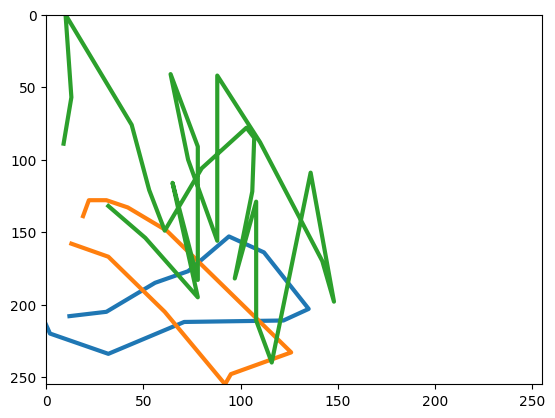

In [167]:
# random campfire image
campfiter = df[df['word'] == 'campfire']

# get the image data for the first campfire
image_data = campfiter.iloc[0]['drawing']
# convert the image data to a string
image_data = str(image_data)

# convert the string to a list 
if isinstance(image_data, str):  
    image_data = ast.literal_eval(image_data) 

# creating a blank canvas to plot
fig, ax = plt.subplots()
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.invert_yaxis()  

# drawing the image
for stroke in image_data:
    x, y = stroke  
    ax.plot(x, y, linewidth=3)

plt.show()

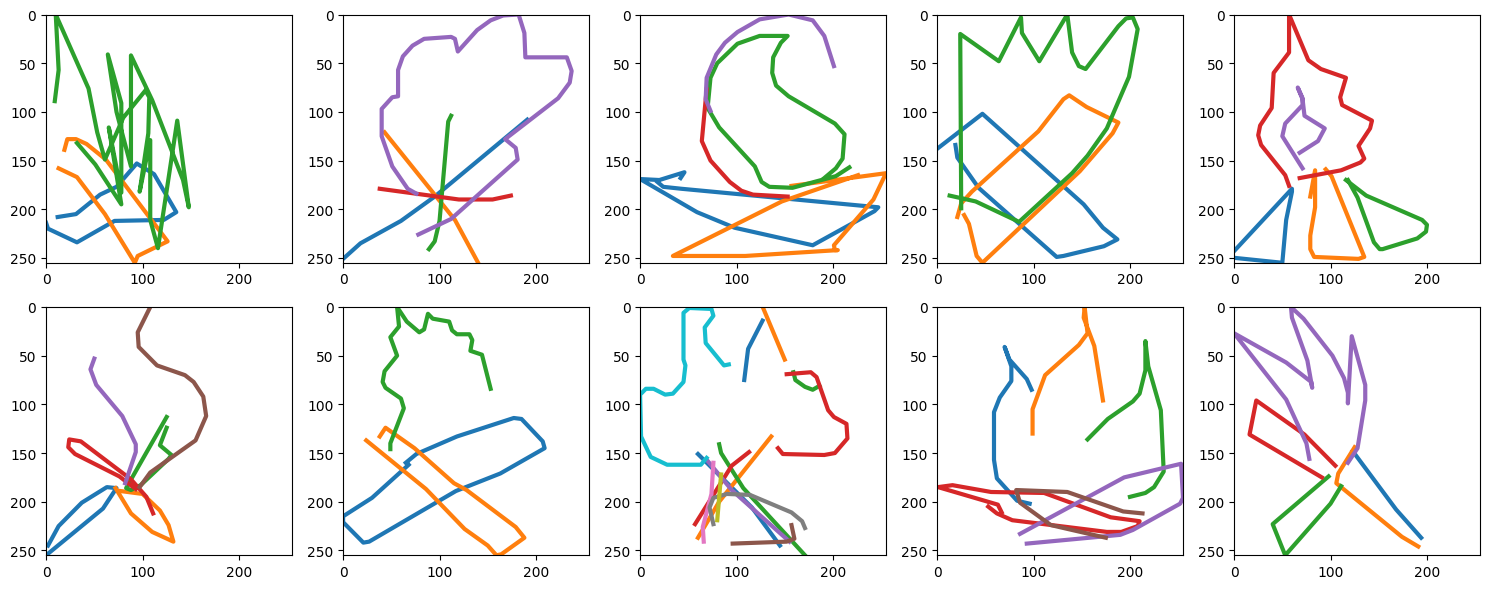

In [168]:
# plotting the first 10 campfire images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()
for i, ax in enumerate(axs):
    if i < 10:
        image_data = campfiter.iloc[i]['drawing']
        if isinstance(image_data, str):  
            image_data = ast.literal_eval(image_data) 
        for stroke in image_data:
            x, y = stroke  
            ax.plot(x, y, linewidth=3)
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
    ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [169]:
def rasterize_drawing(drawing, size=256):
    image = np.ones((size, size), dtype=np.uint8) * 255  # White background
    for stroke in drawing:
        x, y = stroke
        for i in range(len(x) - 1):
            x1, y1 = int(x[i]), int(y[i])
            x2, y2 = int(x[i + 1]), int(y[i + 1])
            # Line interpolation
            rr = np.linspace(y1, y2, num=100).astype(int)
            cc = np.linspace(x1, x2, num=100).astype(int)
            image[rr, cc] = 0  # Black strokes
    return image

In [170]:
df.head()

drawing           word
0  [[[0, 5, 3, 4, 10, 72, 82, 91, 99, 98, 87, 71,...  traffic light
1  [[[0, 255], [3, 4]], [[86, 73, 73, 76, 85, 130...  traffic light
2  [[[39, 33, 34, 39, 52, 61, 66, 65, 67, 71], [2...  traffic light
3  [[[12, 9], [128, 255]], [[0, 23, 36, 37, 42, 5...  traffic light
4  [[[9, 7, 0, 19, 49, 90, 96, 99, 93, 94, 62, 16...  traffic light

In [ ]:
# setting the directories for the images, and the classes
base_dir = '/media/parker/Data_Drive/quick-draw-data/'
train_dir = base_dir + 'training_images/'
test_dir = base_dir + 'testing_images/'
valid_dir = base_dir + 'validation_images/'
classes_dir = base_dir + 'classes_bounding/'

# verify the directories exist
print(os.path.exists(base_dir))
print(os.path.exists(train_dir))
print(os.path.exists(test_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(classes_dir))

# check the number of files in each directory
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)
valid_files = os.listdir(valid_dir)
classes_files = os.listdir(classes_dir)
print(f'Train files: {len(train_files)}')
print(f'Test files: {len(test_files)}')
print(f'Valid files: {len(valid_files)}')
print(f'Classes files: {len(classes_files)}')


True
True
True
True
True


## **Working with the classes**

In [196]:
# making the new column in the words_keep_final dataframe 'class' starting with one not zero
words_keep_final['class_num'] = words_keep_final.index + 0

# rename word to 'class'
words_keep_final = words_keep_final.rename(columns={'words': 'class'})
class_number = words_keep_final
class_number

class  class_num
0        campfire          0
1           cloud          1
2       firetruck          2
3      helicopter          3
4        hospital          4
5        mountain          5
6           skull          6
7      skyscraper          7
8         tractor          8
9   traffic light          9
10           tree         10
11            van         11

## **Centering the images**

In [176]:
def center_drawing(drawing_str, canvas_size=512):
    strokes = ast.literal_eval(drawing_str)
    x_all = []
    y_all = []

    # Collect all points
    for stroke in strokes:
        x, y = stroke
        x_all.extend(x)
        y_all.extend(y)

    x_min, x_max = min(x_all), max(x_all)
    y_min, y_max = min(y_all), max(y_all)

    # Original center of the drawing
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2

    # Target center
    target_center = canvas_size / 2

    # Calculate shift
    dx = target_center - x_center
    dy = target_center - y_center

    # Shift all strokes
    shifted_strokes = []
    for stroke in strokes:
        x, y = stroke
        shifted_x = [xi + dx for xi in x]
        shifted_y = [yi + dy for yi in y]
        shifted_strokes.append((shifted_x, shifted_y))

    return shifted_strokes

In [177]:
# apply the function to the drawing column
df['drawing'] = df['drawing'].apply(lambda x: center_drawing(x, canvas_size=512))

## **Bounding box creation**

In [180]:
def get_square_bbox_with_padding(drawing, padding=10, canvas_size=512):
    x_all = []
    y_all = []

    for stroke in drawing:
        x, y = stroke
        x_all.extend(x)
        y_all.extend(y)

    x_min, x_max = min(x_all), max(x_all)
    y_min, y_max = min(y_all), max(y_all)

    width = x_max - x_min
    height = y_max - y_min
    max_dim = max(width, height)

    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2

    half_dim = max_dim / 2 + padding

    square_x_min = int(max(x_center - half_dim, 0))
    square_x_max = int(min(x_center + half_dim, canvas_size - 1))
    square_y_min = int(max(y_center - half_dim, 0))
    square_y_max = int(min(y_center + half_dim, canvas_size - 1))

    return square_x_min, square_y_min, square_x_max, square_y_max

In [181]:
# applying to the drawing column
df['box'] = df['drawing'].apply(lambda x: get_square_bbox_with_padding(x, padding=20, canvas_size=512))

### **Image rasterization**
- This makes the images black and white

In [182]:
# rasterize strokes to black-on-white image
def rasterize_drawing(drawing, size=512):
    image = np.ones((size, size), dtype=np.uint8) * 255
    for stroke in drawing:
        x, y = stroke
        for i in range(len(x) - 1):
            x1, y1 = int(x[i]), int(y[i])
            x2, y2 = int(x[i + 1]), int(y[i + 1])
            rr = np.linspace(y1, y2, num=100).astype(int)
            cc = np.linspace(x1, x2, num=100).astype(int)
            rr = np.clip(rr, 0, size - 1)
            cc = np.clip(cc, 0, size - 1)
            image[rr, cc] = 0
    return image

In [183]:
# convert entire the entire dataFrame
def convert_dataframe(df):
    images = []
    for i, row in df.iterrows():
        drawing = row['drawing']
        if isinstance(drawing, str):
            drawing = ast.literal_eval(drawing)
        img = rasterize_drawing(drawing)
        images.append(img)
    df['image'] = images
    df = df.drop(columns=['drawing'])
    return df

In [184]:
df = convert_dataframe(df)
df.head()

word                   box  \
0  traffic light  (108, 108, 403, 403)   
1  traffic light  (108, 108, 403, 403)   
2  traffic light  (108, 108, 403, 403)   
3  traffic light  (108, 108, 403, 403)   
4  traffic light  (108, 108, 403, 403)   

                                               image  
0  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
2  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
3  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
4  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...

In [185]:
# saving the dataframe to a csv file in the main directory
df.to_csv('/media/parker/Data_Drive/quick-draw-data/rasterized_w_bbox.csv', index=False)

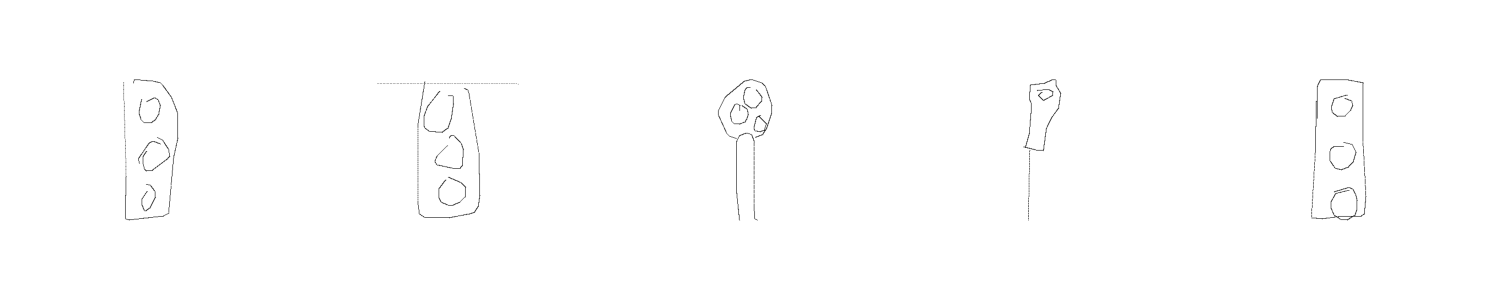

In [186]:
# displaing 5 random images

fig, axs = plt.subplots(1, 5, figsize=(15, 6))
axs = axs.flatten()
for i, ax in enumerate(axs):
    if i < 5:
        image_data = df.iloc[i]['image']
        ax.imshow(image_data, cmap='gray')
        ax.axis('off')
plt.tight_layout()
plt.show()

## **Image Display with Bounding Box**

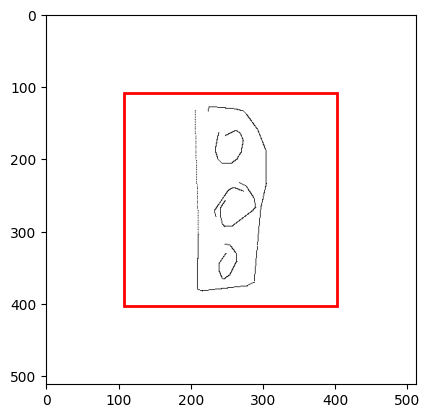

In [187]:
# displaying an image with the bounding box on a 10808x1080 canvas
def display_image_with_bbox(image, bbox):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    x_min, y_min, x_max, y_max = bbox
    rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                         linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.show()
# displaying the first image with the bounding box
image_data = df.iloc[0]['image']
bbox = df.iloc[0]['box']
display_image_with_bbox(image_data, bbox)

## **Final Image Creation**
- This is the final image that will be used for training
- Loading a sample image from the previously made data set because we need to match the old data set with our new data set

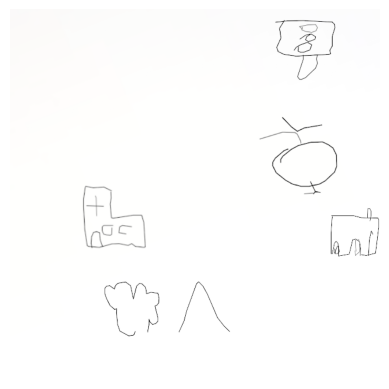

In [190]:
# loading the image_1000.png file
image_path = 'image_1000.png'

# load the image
image = plt.imread(image_path)

# display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [191]:
# getting the demensions of the image
image_shape = image.shape
print(f'Image shape: {image_shape}')

Image shape: (640, 640, 3)


In [197]:
df.head()

word                   box  \
0  traffic light  (108, 108, 403, 403)   
1  traffic light  (108, 108, 403, 403)   
2  traffic light  (108, 108, 403, 403)   
3  traffic light  (108, 108, 403, 403)   
4  traffic light  (108, 108, 403, 403)   

                                               image  
0  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
2  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
3  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
4  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...

In [200]:
# join the dataframe with the words_keep_final dataframe where class matches the word
df = df.merge(words_keep_final, left_on='word', right_on='class', how='left')
df.head()

word                   box  \
0  traffic light  (108, 108, 403, 403)   
1  traffic light  (108, 108, 403, 403)   
2  traffic light  (108, 108, 403, 403)   
3  traffic light  (108, 108, 403, 403)   
4  traffic light  (108, 108, 403, 403)   

                                               image          class  class_num  
0  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  traffic light          9  
1  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  traffic light          9  
2  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  traffic light          9  
3  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  traffic light          9  
4  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  traffic light          9

In [ ]:
# printing out the unique classes and their class numbers
unique_classes = df[['class', 'class_num']].drop_duplicates()
unique_classes = unique_classes.sort_values(by='class_num')
unique_classes

class  class_num
12000       campfire          0
18000          cloud          1
6000       firetruck          2
27000     helicopter          3
30000       hospital          4
33000       mountain          5
21000          skull          6
15000     skyscraper          7
9000         tractor          8
0      traffic light          9
24000           tree         10
3000             van         11

In [222]:
# setting the directories for the images, and the classes
base_dir = '/media/parker/Data_Drive/quick-draw-data/'
train_dir = base_dir + 'training_images/'
train_bounding_dir = base_dir + 'training_bounding/'
test_dir = base_dir + 'testing_images/'
test_bounding_dir = base_dir + 'testing_bounding/'
valid_dir = base_dir + 'validation_images/'
valid_bounding_dir = base_dir + 'validation_bounding/'
ground_turth_dir = base_dir + 'ground_truth/'


# verify the directories exist
print(os.path.exists(base_dir))
print(os.path.exists(train_dir))
print(os.path.exists(train_bounding_dir))
print(os.path.exists(test_dir))
print(os.path.exists(test_bounding_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(valid_bounding_dir))
print(os.path.exists(ground_turth_dir))

# printing the directory of the images
print(f'Train images: {train_dir}')
print(f'Train bounding boxes: {train_bounding_dir}')
print(f'Test images: {test_dir}')
print(f'Test bounding boxes: {test_bounding_dir}')
print(f'Valid images: {valid_dir}')
print(f'Valid bounding boxes: {valid_bounding_dir}')


True
True
True
True
True
True
True
True
Train images: /media/parker/Data_Drive/quick-draw-data/training_images/
Train bounding boxes: /media/parker/Data_Drive/quick-draw-data/training_bounding/
Test images: /media/parker/Data_Drive/quick-draw-data/testing_images/
Test bounding boxes: /media/parker/Data_Drive/quick-draw-data/testing_bounding/
Valid images: /media/parker/Data_Drive/quick-draw-data/validation_images/
Valid bounding boxes: /media/parker/Data_Drive/quick-draw-data/validation_bounding/


In [ ]:
# this limits the number of classes to 5 and a min of 3
max_doodles = 8
min_doodles = 3

# limiting the doodle size
doodle_size = 128 

In [194]:
# setting the amount of images to be used for training, testing, and validation
validation_amount = 1000
train_amount = 10000
test_amount = 1000

#### **`This cell below is what sets the image size to the final size for yolo models and that previously trained model from Gabes hand labled data`**

In [208]:
# setting the canvas size for the images to match the previous data set
canvas_size = 640
canvas = np.ones((canvas_size, canvas_size), dtype=np.uint8) * 255

In [209]:
# Image output name
image_index = 0
image_name = f"sample_{image_index:03d}.png"
image_path = os.path.join(test_dir, image_name)

In [210]:
from PIL import Image
import cv2

In [237]:
def generate_sample_by_split(df, image_index, split,
                              base_dir='/media/parker/Data_Drive/quick-draw-data/',
                              canvas_size=640, doodle_size=128,
                              min_doodles=3, max_doodles=8):

    # Correct folder mapping
    split = split.lower()
    split_map = {
        'train': ('training_images', 'training_bounding'),
        'valid': ('validation_images', 'validation_bounding'),
        'test':  ('testing_images', 'testing_bounding')
    }

    if split not in split_map:
        raise ValueError(f"Unsupported split type: {split}. Use 'train', 'valid', or 'test'.")

    split_image_dir = os.path.join(base_dir, split_map[split][0])
    split_label_dir = os.path.join(base_dir, split_map[split][1])
    ground_truth_dir = os.path.join(base_dir, 'ground_truth/')

    # Create directories if they don't exist
    os.makedirs(split_image_dir, exist_ok=True)
    os.makedirs(split_label_dir, exist_ok=True)
    os.makedirs(ground_truth_dir, exist_ok=True)

    # Initialize canvas
    canvas = np.ones((canvas_size, canvas_size), dtype=np.uint8) * 255
    annotations = []

    # Pick random doodles
    num_doodles = random.randint(min_doodles, max_doodles)
    selected_rows = df.sample(n=num_doodles)

    for _, row in selected_rows.iterrows():
        img = row['image']
        class_num = row['class_num']

        doodle = cv2.resize(img, (doodle_size, doodle_size))

        # Random non-overlapping placement
        max_x = canvas_size - doodle_size
        max_y = canvas_size - doodle_size
        tries = 0
        while tries < 20:
            x = random.randint(0, max_x)
            y = random.randint(0, max_y)
            overlap = False
            for ann in annotations:
                x1, y1, x2, y2 = ann['bbox']
                if not (x + doodle_size < x1 or x > x2 or y + doodle_size < y1 or y > y2):
                    overlap = True
                    break
            if not overlap:
                break
            tries += 1

        if tries == 20:
            continue

        canvas[y:y + doodle_size, x:x + doodle_size] = np.minimum(
            canvas[y:y + doodle_size, x:x + doodle_size], doodle
        )

        annotations.append({
            'class_num': class_num,
            'bbox': (x, y, x + doodle_size, y + doodle_size)
        })

    # Save final image
    image_name = f"{split}_{image_index:05d}.png"
    image_path = os.path.join(split_image_dir, image_name)
    Image.fromarray(cv2.merge([canvas]*3)).save(image_path)

    # Save ground truth visualization
    vis_img = cv2.merge([canvas]*3)
    for ann in annotations:
        x1, y1, x2, y2 = ann['bbox']
        cv2.rectangle(vis_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(vis_img, str(ann['class_num']), (x1+2, y1+15),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    gt_path = os.path.join(ground_truth_dir, image_name)
    Image.fromarray(vis_img).save(gt_path)

    # Save YOLO-format annotation
    label_name = image_name.replace('.png', '.txt')
    label_path = os.path.join(split_label_dir, label_name)
    with open(label_path, 'w') as f:
        for ann in annotations:
            x1, y1, x2, y2 = ann['bbox']
            class_num = ann['class_num']
            x_center = (x1 + x2) / 2 / canvas_size
            y_center = (y1 + y2) / 2 / canvas_size
            width = (x2 - x1) / canvas_size
            height = (y2 - y1) / canvas_size
            f.write(f"{class_num} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

    print(f"✅ {split.title()} Image: {image_path}")
    print(f"📄 Annotations: {label_path}")
    print(f"🟩 GT Preview: {gt_path}")


In [238]:
# Amounts
train_amount = 10000
valid_amount = 1000
test_amount = 1000

In [239]:
import time

In [234]:
# train
print("Generating training samples...")
train_start = time.time()

for i in range(train_amount):
    print(f"📦 Processing TRAIN file {i+1} out of {train_amount}")
    generate_sample_by_split(df, i, split='train')
train_end = time.time()
print(f"✅ Training samples generated in {train_end - train_start:.2f} seconds.")

Generating training samples...
📦 Processing TRAIN file 1 out of 10000
✅ Train Image: /media/parker/Data_Drive/quick-draw-data/training_images/train_00000.png
📄 Annotations: /media/parker/Data_Drive/quick-draw-data/training_bounding/train_00000.txt
🟩 GT Preview: /media/parker/Data_Drive/quick-draw-data/ground_truth/train_00000.png
📦 Processing TRAIN file 2 out of 10000
✅ Train Image: /media/parker/Data_Drive/quick-draw-data/training_images/train_00001.png
📄 Annotations: /media/parker/Data_Drive/quick-draw-data/training_bounding/train_00001.txt
🟩 GT Preview: /media/parker/Data_Drive/quick-draw-data/ground_truth/train_00001.png
📦 Processing TRAIN file 3 out of 10000
✅ Train Image: /media/parker/Data_Drive/quick-draw-data/training_images/train_00002.png
📄 Annotations: /media/parker/Data_Drive/quick-draw-data/training_bounding/train_00002.txt
🟩 GT Preview: /media/parker/Data_Drive/quick-draw-data/ground_truth/train_00002.png
📦 Processing TRAIN file 4 out of 10000
✅ Train Image: /media/parke

In [241]:
# Validation
print("Generating validation samples...")
valid_start = time.time()
for i in range(valid_amount):
    print(f"📦 Processing VALIDATION file {i+1} out of {valid_amount}")
    generate_sample_by_split(df, i, split='valid')
valid_end = time.time()
print(f"✅ Validation samples generated in {valid_end - valid_start:.2f} seconds.")

Generating validation samples...
📦 Processing VALIDATION file 1 out of 1000
✅ Valid Image: /media/parker/Data_Drive/quick-draw-data/validation_images/valid_00000.png
📄 Annotations: /media/parker/Data_Drive/quick-draw-data/validation_bounding/valid_00000.txt
🟩 GT Preview: /media/parker/Data_Drive/quick-draw-data/ground_truth/valid_00000.png
📦 Processing VALIDATION file 2 out of 1000
✅ Valid Image: /media/parker/Data_Drive/quick-draw-data/validation_images/valid_00001.png
📄 Annotations: /media/parker/Data_Drive/quick-draw-data/validation_bounding/valid_00001.txt
🟩 GT Preview: /media/parker/Data_Drive/quick-draw-data/ground_truth/valid_00001.png
📦 Processing VALIDATION file 3 out of 1000
✅ Valid Image: /media/parker/Data_Drive/quick-draw-data/validation_images/valid_00002.png
📄 Annotations: /media/parker/Data_Drive/quick-draw-data/validation_bounding/valid_00002.txt
🟩 GT Preview: /media/parker/Data_Drive/quick-draw-data/ground_truth/valid_00002.png
📦 Processing VALIDATION file 4 out of 10

In [242]:
# Test
print("Generating test samples...")
test_start = time.time()
for i in range(test_amount):
    print(f"📦 Processing TEST file {i+1} out of {test_amount}")
    generate_sample_by_split(df, i, split='test')
test_end = time.time()
print(f"✅ Test samples generated in {test_end - test_start:.2f} seconds.")

Generating test samples...
📦 Processing TEST file 1 out of 1000
✅ Test Image: /media/parker/Data_Drive/quick-draw-data/testing_images/test_00000.png
📄 Annotations: /media/parker/Data_Drive/quick-draw-data/testing_bounding/test_00000.txt
🟩 GT Preview: /media/parker/Data_Drive/quick-draw-data/ground_truth/test_00000.png
📦 Processing TEST file 2 out of 1000
✅ Test Image: /media/parker/Data_Drive/quick-draw-data/testing_images/test_00001.png
📄 Annotations: /media/parker/Data_Drive/quick-draw-data/testing_bounding/test_00001.txt
🟩 GT Preview: /media/parker/Data_Drive/quick-draw-data/ground_truth/test_00001.png
📦 Processing TEST file 3 out of 1000
✅ Test Image: /media/parker/Data_Drive/quick-draw-data/testing_images/test_00002.png
📄 Annotations: /media/parker/Data_Drive/quick-draw-data/testing_bounding/test_00002.txt
🟩 GT Preview: /media/parker/Data_Drive/quick-draw-data/ground_truth/test_00002.png
📦 Processing TEST file 4 out of 1000
✅ Test Image: /media/parker/Data_Drive/quick-draw-data/te